In [1]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


Data can be found at: <a href="https://mbta-massdot.opendata.arcgis.com/datasets/7acd353c1a734eb8a23caf46a0e66b23_0/explore">MBTA_Bus_Ridership_by_Time_Period_Fall</a> 

In [2]:
df = pd.read_csv("../../data/MBTA_Bus_Ridership_by_Time_Period_Fall.csv")

C:\Users\hanna\AppData\Local\Temp\ipykernel_14896\3019257522.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../data/MBTA_Bus_Ridership_by_Time_Period_Fall.csv")


### **1. Initial checks**

In [3]:
df.head()

,mode,season,route_id,route_name,route_variant,stop_sequence,direction_id,day_type_id,day_type_name,time_period_id,time_period_name,stop_name,stop_id,average_ons,average_offs,average_load,num_trips,ons_all_trips,ObjectId
0,3,Fall 2016,1,1,1-_-0,19,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ SIDNEY ST,101,1.400000,2.636842,32.894737,19,26.6,1
1,3,Fall 2016,1,1,1-_-0,20,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ PROSPECT,102,3.868421,10.178947,26.584211,19,73.5,2
2,3,Fall 2016,1,1,1-_-0,21,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ BIGELOW S,104,1.521053,1.168421,26.936842,19,28.9,3
3,3,Fall 2016,1,1,1-_-0,22,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ HANCOCK S,106,0.321053,1.621053,25.626316,19,6.1,4
4,3,Fall 2016,1,1,1-_-0,23,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ DANA ST,107,0.647368,3.336842,22.942105,19,12.3,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086511 entries, 0 to 1086510
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   mode              1086511 non-null  int64  
 1   season            1086511 non-null  object 
 2   route_id          1086511 non-null  object 
 3   route_name        1086511 non-null  object 
 4   route_variant     1086511 non-null  object 
 5   stop_sequence     1086511 non-null  int64  
 6   direction_id      1086511 non-null  int64  
 7   day_type_id       1086511 non-null  object 
 8   day_type_name     1086511 non-null  object 
 9   time_period_id    1086511 non-null  object 
 10  time_period_name  1086511 non-null  object 
 11  stop_name         1086511 non-null  object 
 12  stop_id           1086511 non-null  int64  
 13  average_ons       1086511 non-null  float64
 14  average_offs      1086511 non-null  float64
 15  average_load      1086510 non-null  float64
 16  

In [5]:
df['season'].unique()

array(['Fall 2016', 'Fall 2017', 'Fall 2018', 'Fall 2019', 'Fall 2020',
       'Fall 2021', 'Fall 2022', 'Fall 2023', 'Fall 2024'], dtype=object)

In [6]:
df['season'].value_counts()

season
Fall 2018    134352
Fall 2017    134221
Fall 2016    132848
Fall 2019    128457
Fall 2020    117145
Fall 2021    112548
Fall 2023    109132
Fall 2022    109116
Fall 2024    108692
Name: count, dtype: int64

In [7]:
df.isna().sum()

mode                0
season              0
route_id            0
route_name          0
route_variant       0
stop_sequence       0
direction_id        0
day_type_id         0
day_type_name       0
time_period_id      0
time_period_name    0
stop_name           0
stop_id             0
average_ons         0
average_offs        0
average_load        1
num_trips           0
ons_all_trips       0
ObjectId            0
dtype: int64

Looks like there's one null column. We will drop this in step 2

In [8]:
df.describe()

,mode,stop_sequence,direction_id,stop_id,average_ons,average_offs,average_load,num_trips,ons_all_trips,ObjectId
count,1086511.0,1.086511e+06,1.086511e+06,1.086511e+06,1.086511e+06,1.086511e+06,1.086510e+06,1.086511e+06,1.086511e+06,1.086511e+06
mean,3.0,2.703473e+01,4.958560e-01,1.088404e+04,5.934856e-01,5.987779e-01,9.551229e+00,6.929670e+00,5.233421e+00,5.432560e+05
std,0.0,3.689943e+01,4.999831e-01,1.945152e+04,1.879222e+00,2.023244e+00,8.155511e+00,1.150073e+01,2.863989e+01,3.136489e+05
min,3.0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-2.222222e-01,-3.533333e-01,1.000000e+00,0.000000e+00,1.000000e+00
25%,3.0,1.100000e+01,0.000000e+00,2.176000e+03,0.000000e+00,0.000000e+00,3.700000e+00,2.000000e+00,0.000000e+00,2.716285e+05
50%,3.0,2.300000e+01,0.000000e+00,4.761000e+03,1.000000e-01,1.000000e-01,7.400000e+00,3.000000e+00,4.000000e-01,5.432560e+05
75%,3.0,3.800000e+01,1.000000e+00,8.454000e+03,4.666667e-01,4.645161e-01,1.303333e+01,7.000000e+00,2.300000e+00,8.148835e+05
max,3.0,1.360000e+04,1.000000e+00,1.199130e+05,1.967000e+02,6.780000e+01,1.967000e+02,1.440000e+02,2.378400e+03,1.086511e+06


`mode` is the same for every row. Doesn't add anything so we can drop this in step 2.


In [9]:
df.describe(include=['object'])

,season,route_id,route_name,route_variant,day_type_id,day_type_name,time_period_id,time_period_name,stop_name
count,1086511,1086511,1086511,1086511,1086511,1086511,1086511,1086511,1086511
unique,9,330,309,1069,3,3,11,10,7578
top,Fall 2018,34E,34E,240-1-1,day_type_01,weekday,time_period_05,OFF_PEAK,FOREST HILLS STATION UPPER BU
freq,134352,27608,27608,7755,886311,886311,132424,200200,2481


In [10]:
df.duplicated().sum()

np.int64(0)

### **2. Data cleaning & preprocessing** 

Since the null value is just a single row we can drop it


In [11]:
df = df.dropna()

In [12]:
df = df.drop(columns=['mode'])

### **3. Define questions**

**Overarching question:** How did ridership change before and after the pandemic, across routes, stops, and time periods?
- Did average ridership drop after COVID-19?
- Which routes were most affected? which were least affected? 
- Which routes had high recovery rate post-pandemic? which had least recovery?

#### **3.1. Visual Analysis** 

Below we created a new column Pre-pandemic (2016–2019) and Post-pandemic (2020 onwards). To choose the cutoff date we used WHO's pandemic declaration which is March 11,2020.

In [13]:
df['period'] = df['season'].apply(lambda x: 'pre-pandemic' if '2016' <= x[-4:] <= '2019' else 'post-pandemic')

In [14]:
df.groupby('period')[['average_ons', 'average_offs', 'average_load']].mean()


,average_ons,average_offs,average_load
period,,,
post-pandemic,0.507090,0.511747,7.971930
pre-pandemic,0.684245,0.690204,11.210268


In [33]:
df.groupby('period')[['average_ons', 'average_load', 'num_trips']].describe()


average_ons                                                      \
                    count      mean       std  min  25%  50%       75%    max   
period                                                                          
post-pandemic    556632.0  0.507090  1.553128  0.0  0.0  0.1  0.400000   90.4   
pre-pandemic     529878.0  0.684245  2.165916  0.0  0.0  0.1  0.533333  196.7   

              average_load             ...              num_trips            \
                     count       mean  ...   75%    max     count      mean   
period                                 ...                                    
post-pandemic     556632.0   7.971930  ...  10.9   93.9  556632.0  7.316297   
pre-pandemic      529878.0  11.210268  ...  15.5  196.7  529878.0  6.523528   

                                                     
                     std  min  25%  50%  75%    max  
period                                               
post-pandemic  12.101151  1.0  2.0  4.0  8.0  141.0  
pre-pandemic   10.819361  1.0  2.0  3.0  7.0  144.0  

[2 rows x 24 columns]

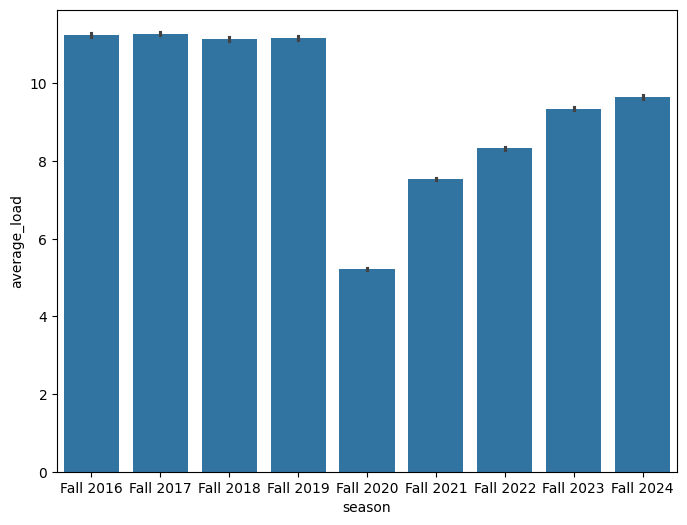

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x='season', y='average_load', data=df)
plt.show()


C:\Users\hanna\AppData\Local\Temp\ipykernel_14896\152651424.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Period")


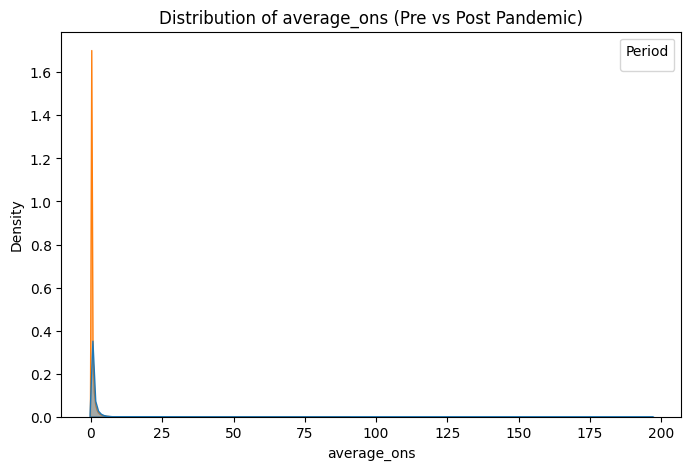

C:\Users\hanna\AppData\Local\Temp\ipykernel_14896\152651424.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Period")


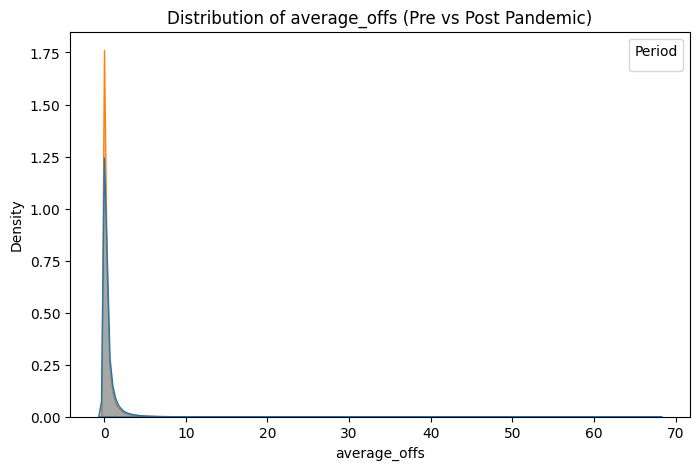

C:\Users\hanna\AppData\Local\Temp\ipykernel_14896\152651424.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Period")


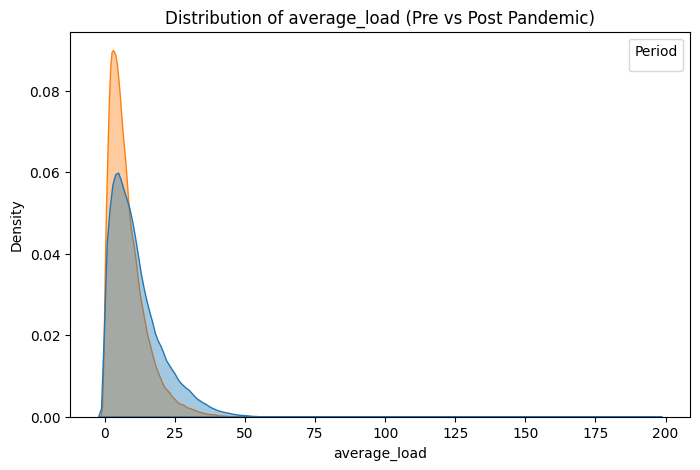

C:\Users\hanna\AppData\Local\Temp\ipykernel_14896\152651424.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Period")


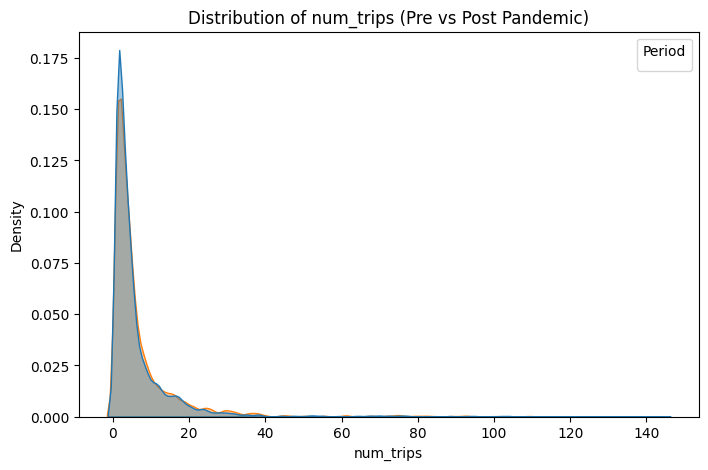

C:\Users\hanna\AppData\Local\Temp\ipykernel_14896\152651424.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Period")


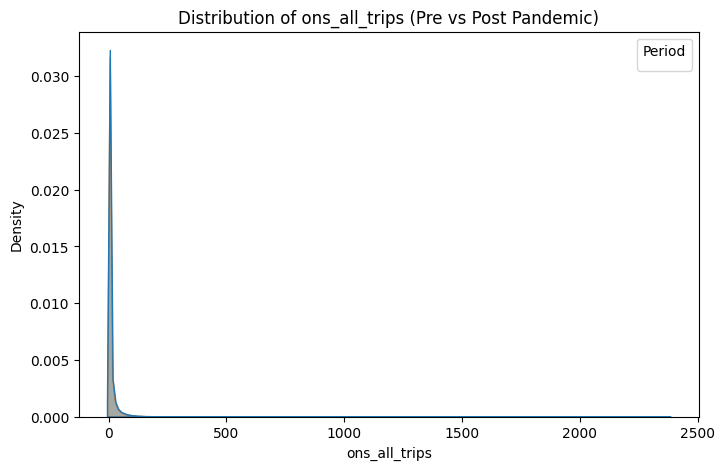

In [34]:
numeric_cols = ['average_ons', 'average_offs', 'average_load', 'num_trips', 'ons_all_trips']

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.kdeplot(data=df, x=col, hue='period', fill=True, common_norm=False, alpha=0.4)
    plt.title(f'Distribution of {col} (Pre vs Post Pandemic)')
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title="Period")
    plt.show()


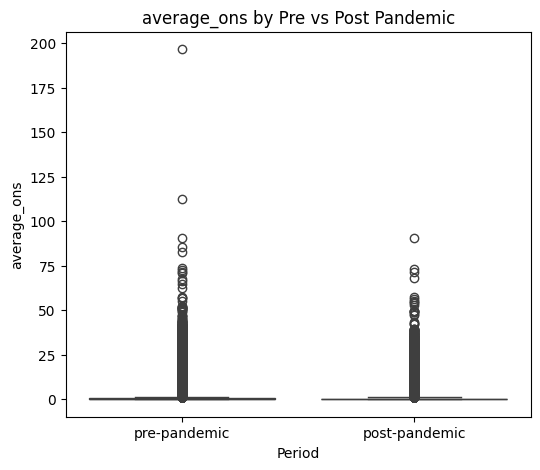

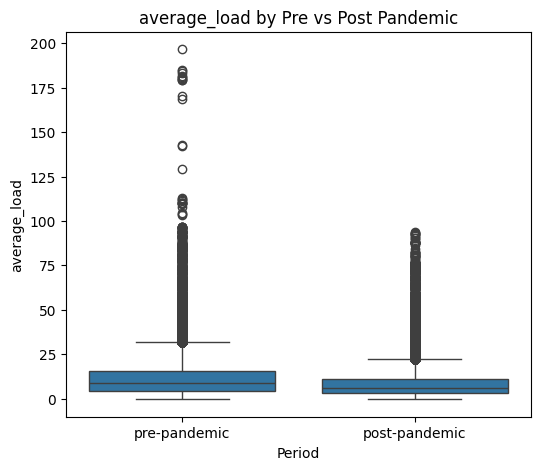

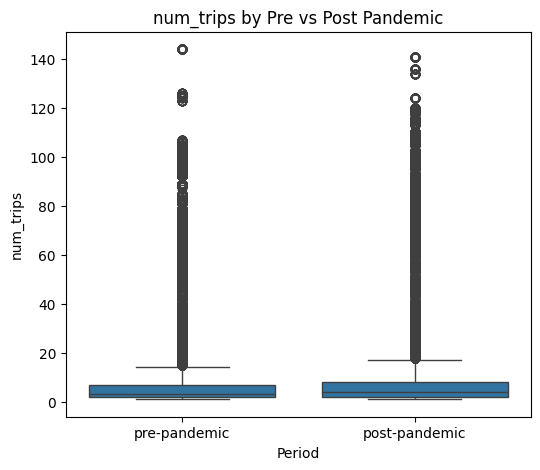

In [36]:
for col in ['average_ons', 'average_load', 'num_trips']:
    plt.figure(figsize=(6,5))
    sns.boxplot(data=df, x='period', y=col)
    plt.title(f'{col} by Pre vs Post Pandemic')
    plt.xlabel("Period")
    plt.ylabel(col)
    plt.show()


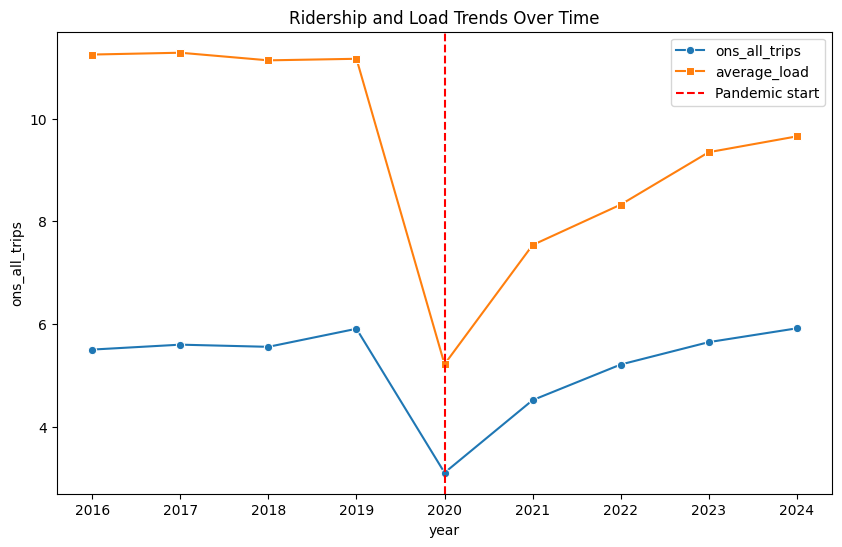

In [38]:
# Aggregate by year (mean)
df['year'] = df['season'].str.extract(r'(\d{4})').astype(int)
agg_year = df.groupby(['year']).agg({'ons_all_trips':'mean', 'average_load':'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10,6))
sns.lineplot(data=agg_year, x='year', y='ons_all_trips', marker='o', label='ons_all_trips', ax=ax1)
sns.lineplot(data=agg_year, x='year', y='average_load', marker='s', label='average_load', ax=ax1)
plt.axvline(2020, color='red', linestyle='--', label='Pandemic start')
plt.title('Ridership and Load Trends Over Time')
plt.legend()
plt.show()


By time period (AM/PM/Midday/etc.)

C:\Users\hanna\AppData\Local\Temp\ipykernel_14896\2030178311.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='time_period_name', y='average_ons', hue='period', estimator='mean', ci=None)


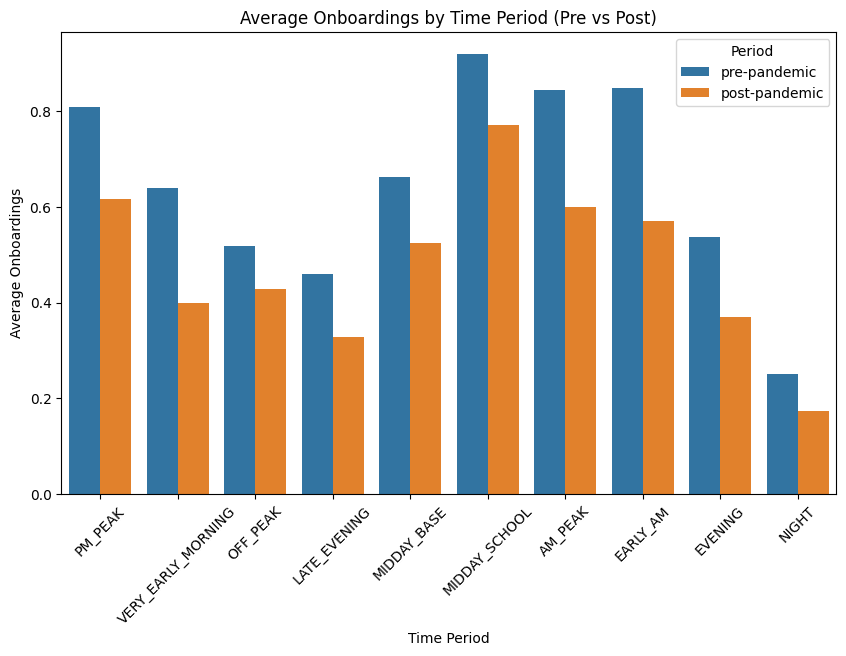

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='time_period_name', y='average_ons', hue='period', estimator='mean', ci=None)
plt.title('Average Onboardings by Time Period (Pre vs Post)')
plt.xlabel('Time Period')
plt.ylabel('Average Onboardings')
plt.legend(title='Period')
plt.xticks(rotation=45)
plt.show()


By day type (weekday/weekend)

C:\Users\hanna\AppData\Local\Temp\ipykernel_14896\3036746856.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='day_type_name', y='ons_all_trips', hue='period', estimator='mean', ci=None)


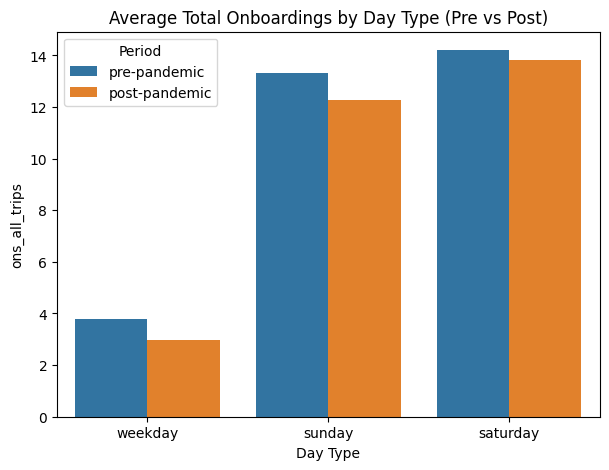

In [40]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='day_type_name', y='ons_all_trips', hue='period', estimator='mean', ci=None)
plt.title('Average Total Onboardings by Day Type (Pre vs Post)')
plt.xlabel('Day Type')
plt.ylabel('ons_all_trips')
plt.legend(title='Period')
plt.show()


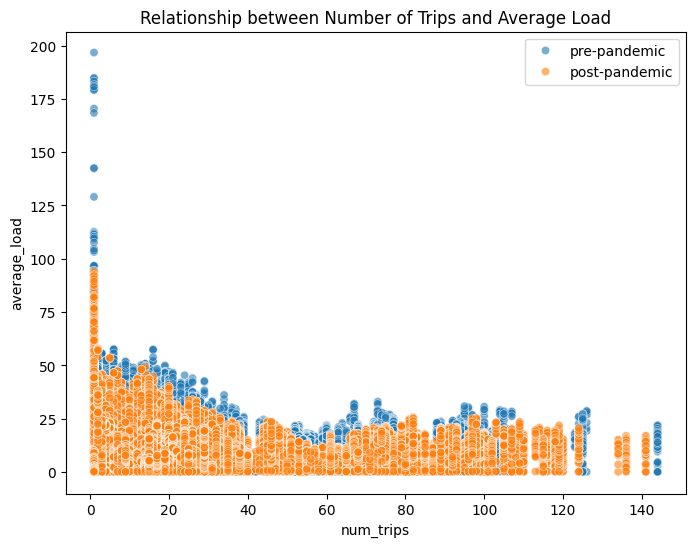

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='num_trips', y='average_load', hue='period', alpha=0.6)
sns.regplot(data=df[df['period']=='pre'], x='num_trips', y='average_load', scatter=False, color='blue', label='pre trend')
sns.regplot(data=df[df['period']=='post'], x='num_trips', y='average_load', scatter=False, color='orange', label='post trend')
plt.title('Relationship between Number of Trips and Average Load')
plt.legend()
plt.show()


Compute average ridership per route per period

In [17]:
route_ridership = (
    df.groupby(['route_id', 'period'])['average_load']
    .mean()
    .reset_index()
)


Pivot for comparison

In [19]:
route_pivot = route_ridership.pivot(index='route_id', columns='period', values='average_load').reset_index()

Compute ridership change

In [20]:
route_pivot['change'] = route_pivot['post-pandemic'] - route_pivot['pre-pandemic']
route_pivot['percent_change'] = (route_pivot['change'] / route_pivot['pre-pandemic']) * 100

Identify top and least affected routes

In [23]:
most_affected = route_pivot.sort_values('percent_change').head(20)
least_affected = route_pivot.sort_values('percent_change', ascending=False).head(20)

Visualize results

C:\Users\hanna\AppData\Local\Temp\ipykernel_14896\4036487196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='route_id', y='percent_change', data=most_affected, palette='Reds_r')


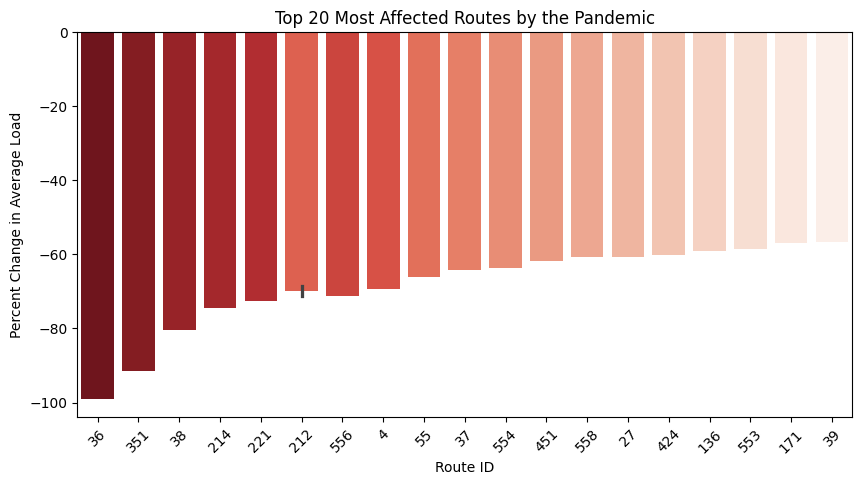

C:\Users\hanna\AppData\Local\Temp\ipykernel_14896\4036487196.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='route_id', y='percent_change', data=least_affected, palette='Greens')


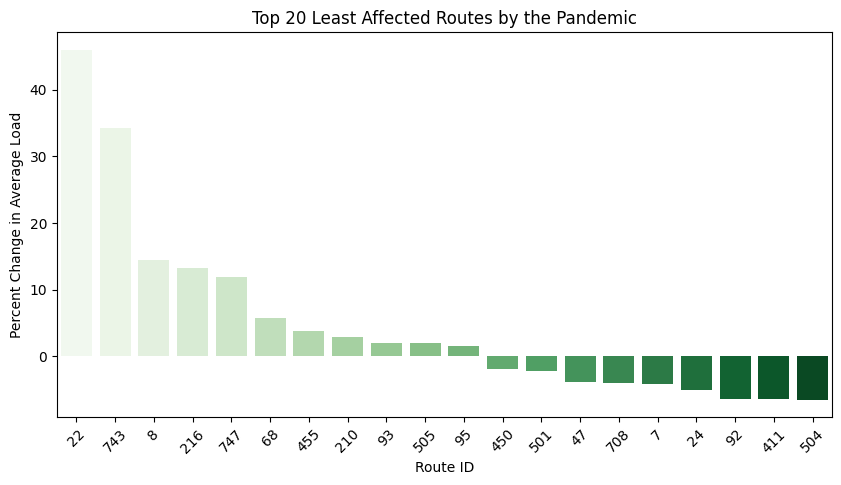

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x='route_id', y='percent_change', data=most_affected, palette='Reds_r')
plt.title('Top 20 Most Affected Routes by the Pandemic')
plt.ylabel('Percent Change in Average Load')
plt.xlabel('Route ID')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='route_id', y='percent_change', data=least_affected, palette='Greens')
plt.title('Top 20 Least Affected Routes by the Pandemic')
plt.ylabel('Percent Change in Average Load')
plt.xlabel('Route ID')
plt.xticks(rotation=45)
plt.show()

Looks like the 11 least affected routes have actually increased in ridership after the pandemic. Possible reasons could be error in the data(outliers) or actual travel pattern shifts. Eg. routes serving residential or suburban areas might see more use as remote workers commute locally. So this needs further investigation

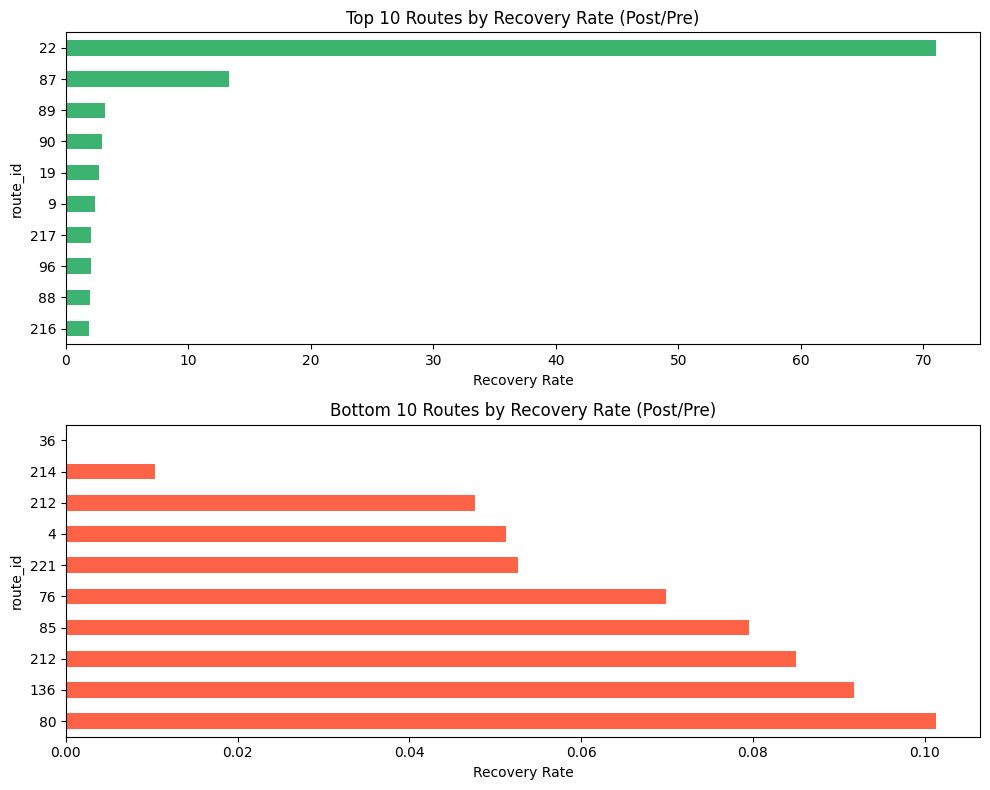

In [31]:
df['pandemic_period'] = df['season'].apply(
    lambda x: 'pre' if any(y in x for y in ['2016', '2017', '2018', '2019']) else 'post'
)

route_df = df.groupby(['route_id', 'pandemic_period'])['ons_all_trips'].sum().unstack()
route_df['recovery_rate'] = route_df['post'] / route_df['pre']

top10 = route_df.nlargest(10, 'recovery_rate')
bottom10 = route_df.nsmallest(10, 'recovery_rate')

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

top10['recovery_rate'].plot(kind='barh', ax=axes[0], color='mediumseagreen')
axes[0].set_title('Top 10 Routes by Recovery Rate (Post/Pre)')
axes[0].set_xlabel('Recovery Rate')
axes[0].invert_yaxis()

bottom10['recovery_rate'].plot(kind='barh', ax=axes[1], color='tomato')
axes[1].set_title('Bottom 10 Routes by Recovery Rate (Post/Pre)')
axes[1].set_xlabel('Recovery Rate')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

#### **3.2. Statistical Analysis**

In [27]:

pre = df[df['period'] == 'pre-pandemic']['average_load']
post = df[df['period'] == 'post-pandemic']['average_load']

t_stat, p_val = ttest_ind(pre, post, equal_var=False)
print(f't_stat: {t_stat}, p_val: {p_val}')

t_stat: 209.56561451207267, p_val: 0.0


Since `p_val` is less than 0.05, the difference is statistically significant. The positive `t-stat` indicates that average ridership decreased after the pandemic. Given how large the t-statistic is (≈ 210), the increase is not only significant but extremely large in magnitude.